# Generate a Cutting XML from segmentation mask using the Segmentation Loader.

In [16]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from lmd.lib import SegmentationLoader

## Load Segmentation Mask

The stitched images were segmented in cellpose and saved to file.

![Cellpose Segmentation](./test_data/cellculture_example/cellpose_segmentation.png "Cellpose Segmentation")

The results can then easily be loaded into python and transformed into an XML for excision using the LMD.

Besides Cellpose, the py-lmd is compatible with any segmentation method that results in a segmentation mask where each pixel is assigned to either background (0) or a cellid (not 0).

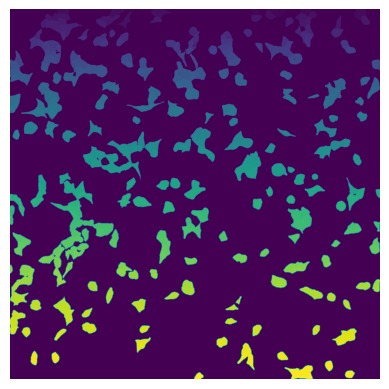

In [17]:
from PIL import Image

im_frame = Image.open("./test_data/cellculture_example/stitching_test_Alexa488_cp_masks.png")
segmentation_mask = np.array(im_frame)

plt.imshow(segmentation_mask);
plt.axis("off");

## Define cell sets
Define cell sets and assign specific cell ids to the well into which they should be excised.

In [18]:
cell_ids = np.unique(segmentation_mask)
cell_sets = [{"classes": cell_ids, "well": "A1"}]

## Calibration points

Calibration points can be determined by reading out the coordinates of the chosen points (e.g. in FIJI). When working with cell culture models the built in calibration crosses within pylmd can be used to generate easily recognizable points to identify both in the imaging data and while loading the XML at the microscope.

In [19]:
calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

## XML generation

Finally the calibration points and segmentation_mask are passed to the SegmentationLoader and they can be transformed into LMD compatible excision shapes.

A variety of further parameters can be passed to post-process the generated shapes (e.g. smoothing, shape dilation, or optimization of cutting path) using the loader_config.

/Users/sophia/Documents/GitHub/py-lmd/src/lmd/segmentation.py:34: NumbaTypeSafetyWarning: unsafe cast from uint32 to int32. Precision may be lost.
  if i not in classes:
100%|██████████| 503/503 [00:01<00:00, 423.76it/s]


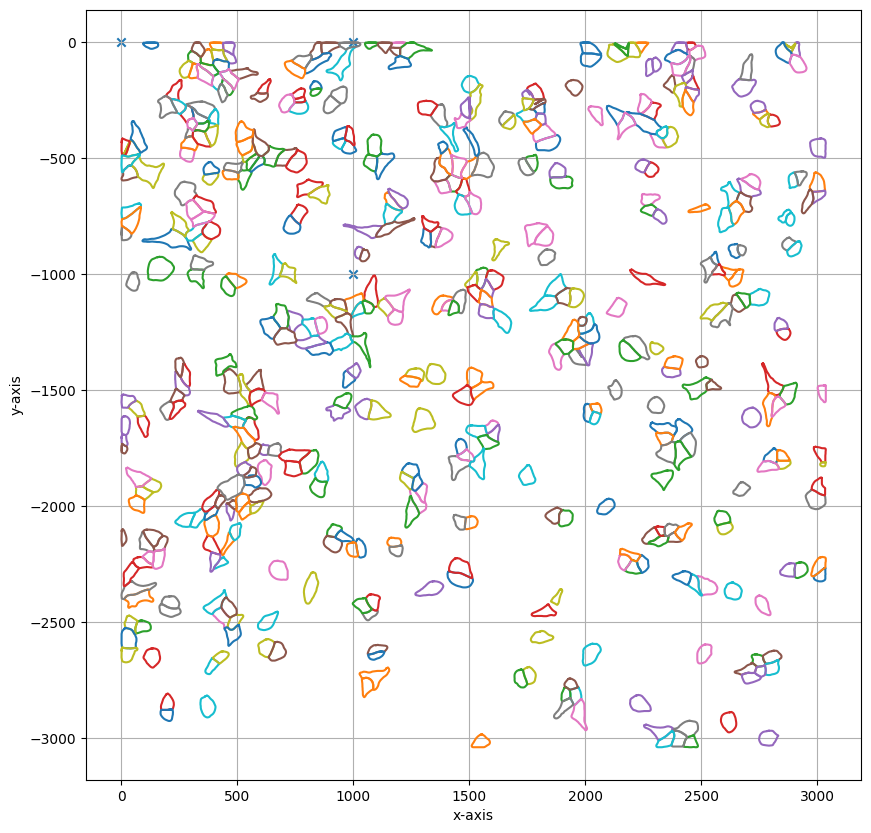

In [20]:
loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    "shape_compression":42
}

sl = SegmentationLoader(config = loader_config)

shape_collection = sl(segmentation_mask, 
                        cell_sets, 
                        calibration_points)
                
shape_collection.plot(fig_size = (10, 10))

===== Collection Stats =====
Number of shapes: 503
Number of vertices: 30,080
Mean vertices: 60
Min vertices: 19
5% percentile vertices: 37
Median vertices: 59
95% percentile vertices: 84
Max vertices: 125
None


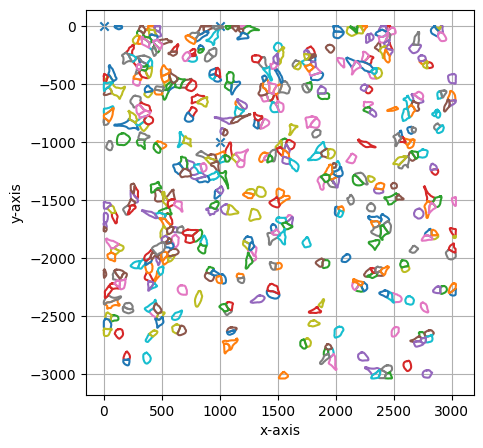

In [21]:
#print some statistics on the shapes included in the collection and visualize results
print(shape_collection.stats())
shape_collection.plot(calibration = True)

## write to XML

In [22]:
shape_collection.save("./test_data/cellculture_example/shapes_1.xml")

[0 0]
[100000      0]
[ 100000 -100000]
